In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [8]:

data["Gender"].head()

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [9]:

data["Gender"]=data["Gender"].replace("Male",0)
data["Gender"]=data["Gender"].replace("Female",1)

data["Gender"].head()

0    0
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64

In [10]:
feature=["Height","Weight","Gender"]
X=data[feature]
y=data.iloc[:,-1]


(array([ 13.,   0.,  22.,   0.,  69.,   0.,  68.,   0., 130., 198.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

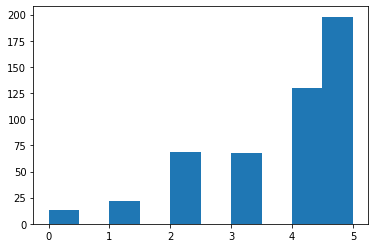

In [11]:
plt.hist(y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=42)

In [14]:
cls.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_pred=cls.predict(X_test)
y_pred

array([5, 2, 3, 3, 5, 5, 5, 5, 3, 5, 4, 5, 1, 5, 5, 2, 5, 5, 3, 5, 0, 5,
       1, 4, 4, 5, 5, 5, 5, 2, 5, 5, 4, 4, 4, 2, 5, 2, 3, 2, 5, 2, 4, 4,
       5, 4, 3, 4, 4, 4, 5, 5, 2, 1, 5, 3, 3, 5, 5, 4, 5, 5, 4, 5, 0])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_cls1 = accuracy_score(y_pred,y_test)

In [17]:
accuracy_cls1

0.7692307692307693

In [18]:
from sklearn.ensemble import RandomForestClassifier
cls2=RandomForestClassifier()

In [19]:
cls2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred=cls2.predict(X_test)
X_test

,Height,Weight,Gender
361,161,103,0
73,180,75,0
374,174,95,0
155,179,103,1
104,192,140,1
...,...,...,...
494,152,98,0
262,156,137,0
323,187,140,0
483,146,85,0


In [21]:
y_pred

array([5, 2, 3, 4, 4, 5, 5, 5, 4, 5, 4, 5, 1, 5, 5, 3, 5, 5, 3, 5, 2, 5,
       1, 4, 4, 5, 5, 5, 5, 2, 5, 5, 4, 4, 4, 2, 5, 2, 4, 2, 5, 1, 4, 3,
       5, 4, 3, 4, 4, 4, 5, 4, 2, 1, 5, 3, 3, 5, 5, 4, 5, 5, 4, 5, 0])

In [22]:
accuarcy_cls2=accuracy_score(y_pred,y_test)

In [23]:
accuarcy_cls2

0.8769230769230769

In [28]:
x_new=pd.DataFrame({"Height":[165],"Weight":[83],"Gender":[0]})
x_new


,Height,Weight,Gender
0,165,83,0


In [29]:
y_sam=cls2.predict(x_new)

In [30]:
def BMI_pred(i):
    if i == 0:
        x="Extremely Weak"
    elif i ==1:
        x="Weak"
    elif i==2:
        x="Normal"
    elif i==3:
        x="Overweight"
    elif i==4:
        x="Obesity"  
    else:
        x="Extreme Obesity"
    return x


In [31]:
y_sam = BMI_pred(y_sam)
y_sam

'Overweight'